In [216]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [217]:
dataset=load_iris()
dataset['data']
data=np.random.permutation(dataset['data'])
label=np.random.permutation(dataset['target'])
train_data=data[0:120]
train_label=label[0:120]
test_data=data[120:150]
test_label=label[120:150]

In [218]:
train_data

array([[6.4, 2.8, 5.6, 2.2],
       [5.1, 3.8, 1.5, 0.3],
       [6.1, 2.8, 4. , 1.3],
       [5.8, 2.6, 4. , 1.2],
       [6.3, 3.3, 4.7, 1.6],
       [6. , 2.9, 4.5, 1.5],
       [7.2, 3.6, 6.1, 2.5],
       [4.4, 3. , 1.3, 0.2],
       [6.3, 2.8, 5.1, 1.5],
       [6.2, 3.4, 5.4, 2.3],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [5.5, 4.2, 1.4, 0.2],
       [5.5, 2.3, 4. , 1.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.6, 2.7, 4.2, 1.3],
       [4.6, 3.4, 1.4, 0.3],
       [6.9, 3.1, 4.9, 1.5],
       [4.8, 3. , 1.4, 0.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.9, 3.1, 5.4, 2.1],
       [5.8, 2.7, 4.1, 1. ],
       [6.3, 2.7, 4.9, 1.8],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3.1, 4.4, 1.4],
       [5.5, 2.4, 3.7, 1. ],
       [6. , 3. , 4.8, 1.8],
       [5.6, 3

In [219]:
train_label

array([0, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2,
       0, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 0, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2, 2,
       2, 0, 0, 1, 2, 1, 0, 0, 1, 0])

In [220]:
class NeuralNet(object):
    def __init__(self,eta=0.1,batchsize=1,epoch=5,eps=1e-5,inputsize=1,outputsize=1):
        self.eta=eta
        self.W=np.zeros((inputsize,outputsize))
        self.B=np.zeros((1,outputsize))
        self.batchsize=batchsize
        self.epoch=epoch
        self.eps=eps
        self.inputsize=inputsize
        self.outputsize=outputsize
        self.loss=[]
        self.xmax=0
        self.xmin=0
        self.ymax=0
        self.ymin=0
    def __forword(self,X):
        Z=np.dot(X,self.W)+self.B
        A=self.__softmax(Z)
        return A
    def __backword(self,X,Y):
        #todo:反向传播的时候是否除以批样本大小
        dZ=self.__forword(X)-Y
        dB=dZ.sum(axis=0,keepdims=True)/self.batchsize
        dW=np.dot(X.T,dZ)/self.batchsize
        return dW,dB
    def __update(self,dW,dB):
        self.W=self.W-dW*self.eta
        self.B=self.B-dB*self.eta
    def trainwithoutnor(self,data,label):
        for i in range(int(len(data)*self.epoch/self.batchsize)):
            I=int(i*self.batchsize%len(data))
            X=np.array(data[I:I+self.batchsize])
            Y=np.array(label[I:I+self.batchsize])
            A=self.__forword(X)
            Loss=self.lossfunction(Y,A)
            self.loss.append(Loss)
            if Loss>self.eps:
                dW,dB=self.__backword(X,Y)
                self.__update(dW,dB)
    def train(self,data,label):
        self.__getxmaxandmin(data)
        self.__getymaxandmin(label)
        for i in range(int(len(data)*self.epoch/self.batchsize)):
            I=int(i*self.batchsize%len(data))
            X1=np.array(data[I:I+self.batchsize])
            X=self.nomornalize(self.xmax,self.xmin,X1)
            Y1=np.array(label[I:I+self.batchsize])
            Y=self.nomornalize(self.ymax,self.ymin,Y1)
            A=self.__forword(X)
            Loss=self.lossfunction(Y,A)
            self.loss.append(Loss)
            if Loss>self.eps:
                dW,dB=self.__backword(X,Y)
                self.__update(dW,dB)
    def __getxmaxandmin(self,data):
        self.xmax=np.amax(data,axis=0)
        self.xmin=np.amin(data,axis=0)
    def __getymaxandmin(self,data):
        self.ymax=np.max(data)
        self.ymin=np.min(data)
    def nomornalize(self,max,min,x):
        return (x-min)/(max-min)
    def denomornalize(self,max,min,x):
        return x*(max-min)+min
    def inferencewithoutnor(self,X):
        if X.shape[0]!=1:
            nomornalz1=X*self.W+self.B
            nomornalz=self.__softmax(nomornalz1)
        else:
            nomornalz=self.__forword(X)
        return nomornalz
    def inference(self,X):
        nomornalz=self.inferencewithoutnor(X)       
        return self.denomornalize(self.ymax,self.ymin,nomornalz)
    def logistic(self,z):
        a=1.0/(1.0+np.exp(-z))
        return a
    def lossfunction(self,Y,A):
        p1=np.log(A)
        p2=np.multiply(Y,p1)
        Loss=-np.sum(p2)
        loss=Loss/self.batchsize
        return loss
    def __softmax(self,Z):
        shift_Z=Z-np.max(Z,axis=1,keepdims=True)
        exp_Z=np.exp(shift_Z)
        A=exp_Z/np.sum(exp_Z,axis=1,keepdims=True)
        return A
    def onehot(self,label):
        new_label=np.zeros((int(label.shape[0]),3))
        for i in range(label.shape[0]):
            n=(int)(label[i])
            new_label[i,n]=1
        return new_label


[[-0.08627225  0.07225286  0.01401939]
 [-0.0212715   0.04595384 -0.02468234]
 [ 0.09664238 -0.14405327  0.04741089]
 [ 0.07366765  0.01980801 -0.09347566]]
[[ 0.06384046 -0.01723637 -0.04660409]]
[2 2 0 1 2 0 0 1 2 0 0 1 0 0 0 2 2 0 1 1 2 0 0 2 1 1 1 2 1 2]
[0 0 0 1 0 2 1 0 2 0 1 1 2 1 0 0 2 1 2 0 1 1 0 2 1 1 1 2 0 2]
0.4666666666666667


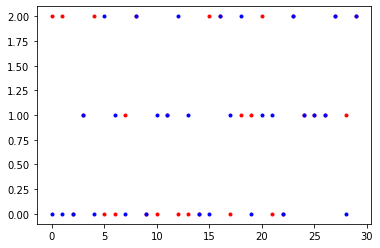

In [233]:
net=NeuralNet(eta=0.01,batchsize=120,epoch=1000,inputsize=4,outputsize=3)
new_label=net.onehot(train_label)
net.trainwithoutnor(data=train_data,label=new_label)
print(net.W)
print(net.B)
pre_label=[]
for i in range(result.shape[0]):
    result[i]=net.inferencewithoutnor(test_data[i].reshape(1,4))
for i in range(result.shape[0]):
    pre_label.append(np.argmax(result[i]))
print(test_label)
print(np.array(pre_label))
success_rate=0
success=0
for i in range(result.shape[0]):
    if test_label[i]==pre_label[i]:
        success+=1
success_rate=success/30.0
print(success_rate)

plt.plot(test_label,'.',c='r')
plt.plot(pre_label,'.',c='b')